# ISLR- Python: Chapter 4 -- Lab: Classification

- [Load Datasets](#Load-Datasets)
- [4.6.1 Compute Data Correlations](#4.6.1-Compute-Data-Correlations)
- [4.6.2 Logistic Regression of Market Direction](#4.6.2-Logistic-Regression-of-Market-Direction)
- [4.6.3 Linear Discriminant Aanlysis of Market Direction](#4.6.3-Linear-Discriminant-Analysis-of-Market-Direction)
- [4.6.4 Quadratic Discriminant Analysis of Market Direction](#4.6.4-Quadratic-Discriminant-Analysis-of-Market-Direction)
- [4.6.5 K-Nearest Neighbors Analysis of Market Direction](#K-Nearest-Neighbors-Analysis-of-Market-Direction)
- [4.6.6 K-Nearest Neighbors Applied to Caravan Insurance Data](#K-Nearest-Neighbors-Applied-to-Caravan-Insurance-Data)

In [1]:
## perform imports and set-up
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

# print numpy arrays with precision 4
np.set_printoptions(precision=4)

## Load Datasets

In [2]:
# Load data and display first rows
market_df = pd.read_csv('../../data/Smarket.csv',index_col=0)
market_df.head()

# Load the caravan insurance data for section 4.6.6
caravan_df = pd.read_csv('../../data/Caravan.csv', index_col=0)

In [3]:
# Show summary statistics of the data
print(market_df.shape)
market_df.describe()

(1250, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


## 4.6.1 Compute Data Correlations

In [4]:
# Compute correlation coeffecient matrix
corr_matrix = market_df.corr(method='pearson')
print(corr_matrix)

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   

           Today  
Year    0.030095  
Lag1   -0.026155  
Lag2   -0.010250  
Lag3   -0.002448  
Lag4   -0.006900  
Lag5   -0.034860  
Volume  0.014592  
Today   1.000000  


#### There is no correlation between todays percentage return and the previous 5 days (lag1..lag5) days precentage returns. The only correlation is between years and volume. The plot below shows that volume increases over time.

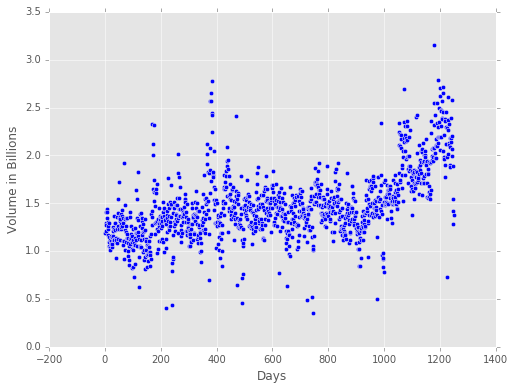

In [5]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(market_df.index, market_df.Volume.values);
ax.set_xlabel('Days');
ax.set_ylabel('Volume in Billions');

## 4.6.2 Logistic Regression of Market Direction

#### Attempt to predict market direction (up/down) using the lags and volume predictors. 

In [6]:
# Get the lag and volume column names
predictors = market_df.columns[1:7]
# Create the design matrix
X = sm.add_constant(market_df[predictors])
# Encode the response as 0,1 for down/up
Y = pd.Series([1 if el=='Up' else 0 for el in market_df.Direction.values],index=X.index)
logit = sm.Logit(Y,X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Fri, 15 Jul 2016   Pseudo R-squ.:                0.002074
Time:                        16:07:42   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601        -0.598     0.346
Lag1          -0.0731      0.

In [7]:
# get the first 10 predictions for the training data set
training_predictions = results.predict(X)[:10]
print(training_predictions)

# convert the probabilities to 'Up' or 'Down' qualitative variables
direction_predictions = ['Up' if el > 0.5 else 'Down' for el in training_predictions]
direction_predictions[:10]

[ 0.5071  0.4815  0.4811  0.5152  0.5108  0.507   0.4927  0.5092  0.5176
  0.4888]


['Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down']

In [8]:
# we can now build a confusion matrix to asses the correct and incorrect predictions. 
table = results.pred_table(threshold=0.5)
confusion_df = pd.DataFrame(table,['Down','Up'],['Down','Up'])
print(confusion_df)
print('')
print('The model made', 
      (confusion_df.Down[0]+confusion_df.Up[1])/confusion_df.sum().sum(), '% correct predictions on the TRAINING SET.')

      Down   Up
Down   145  457
Up     141  507

The model made 0.5216 % correct predictions on the TRAINING SET.


#### Split the data into a training and test set and recompute the model's accuracy on the test set.

In [9]:
# Split the data into training and test dataframes
training_df = market_df[market_df.Year<2005]
test_df = market_df[market_df.Year==2005]

# Compute Training Coeffecients #
#################################
# Use the lags and volume as predictors for the years 2001 to 2004 (training set)
predictors = training_df.columns[1:7]
# Create the design matrix for the training_df
X_train = sm.add_constant(training_df[predictors])

# Encode the response as 0,1 for down/up for response variable of the training set
Y_train = pd.Series([1 if el=='Up' else 0 for el in training_df.Direction.values],index=X_train.index)
# fit the model and return the training results
train_logit = sm.Logit(Y_train,X_train)
train_results = train_logit.fit()

# Make Predictions on Test Set #
################################
# make a design matrix for the testing data
X_test = sm.add_constant(test_df[predictors])

# Encode the response as 0,1 for down/up for response variable of the test set
Y_test = pd.Series([1 if el=='Up' else 0 for el in test_df.Direction.values],index=X_test.index)

# now use the training coeffecients to make predictions about the returns of the testing set (year=2005)
test_predictions = train_results.predict(X_test)

# Convert the probability predictions to a binary prediction
prediction_array = np.array(test_predictions > 0.5, dtype=float)

# print the percentage of correct predictions
print('')
print(' The model made', np.mean(prediction_array == Y_test),'% correct predictions on the TEST SET.')

# Compute Test Confusion Matrix #
#################################
# Stats models doesn't have an option for a confusion matrix for test sets-- we build one by hand using
# hsitogram2d
table = np.histogram2d(prediction_array, Y_test, bins=2)[0]
pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up'])

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4

 The model made 0.480158730159 % correct predictions on the TEST SET.


,Down,Up
Down,77,97
Up,34,44


#### Fit a model using only the two lowest p-value lag variables (lag1 and lag2).

Adding non-significant variables to our model reduces the performance on the training set because it causes an increase in the model variance without a corresponding decrease in the bias. We now fit a reduced model with only the lag1 and lag2 variables since these two had the lowest p-values in the full model.

In [10]:
# Compute Reduced Training Model Coeffecients #
###############################################
# use lag 1 and lag 2 as the predictors
predictors = ['Lag1','Lag2']
X_train_red = sm.add_constant(training_df[predictors])
# Encode the response as 0,1 for down/up for response variable of the training set
Y_train_red = pd.Series([1 if el=='Up' else 0 for el in training_df.Direction.values],index=X_train_red.index)
# fit the model and return the training results
train_logit_red = sm.Logit(Y_train_red,X_train_red)
train_results_red = train_logit_red.fit()

# Make Predictions on Test Set #
################################
# make design matrix for testing data
X_test_red = sm.add_constant(test_df[predictors])
# Encode the response as 0,1 for down/up for response variable of the test set
Y_test_red = pd.Series([1 if el=='Up' else 0 for el in test_df.Direction.values],index=X_test_red.index)

# now use the training coeffecients to make predictions about the returns of the testing set (year=2005)
test_predictions_red = train_results_red.predict(X_test_red)

# Convert the probability predictions to a binary prediction
prediction_array_red = np.array(test_predictions_red > 0.5, dtype=float)

# print the percentage of correct predictions
print('')
print(' The model made', np.mean(prediction_array_red == Y_test_red),
      '% correct predictions on the TEST SET using', predictors, 'predictors.')
print('')

# Compute Test Confusion Matrix #
#################################
# Stats models doesn't have an option for a confusion matrix for test sets-- we build one by hand using
# hsitogram2d
table = np.histogram2d(prediction_array_red, Y_test_red, bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('On days where the previous day was \'Up\' the probability the market will be \'Up\' is',
      table[1][1]/(table[1][0]+table[1][1]))

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3

 The model made 0.559523809524 % correct predictions on the TEST SET using ['Lag1', 'Lag2'] predictors.

      Down   Up
Down    35   35
Up      76  106

On days where the previous day was 'Up' the probability the market will be 'Up' is 0.582417582418


## 4.6.3 Linear Discriminant Analysis of Market Direction

Predict the market direction using Lag1 and Lag2 as predictors using scikit learn LDA module.

In [11]:
# use lag 1 and lag 2 as the predictors
predictors = ['Lag1','Lag2']

X_train = training_df[predictors].values
# Encode the response as 0,1 for down/up for response variable of the training set
Y_train = np.array([1 if el=='Up' else 0 for el in training_df.Direction.values])

# Create Classifier
lda_clf = LDA(solver='lsqr',store_covariance=True)
# Fit model
lda_clf.fit(X_train,Y_train)

print('Class Priors =', lda_clf.priors_)
print('Class Means =', lda_clf.means_)
print('Coeffecients =', lda_clf.coef_)

Class Priors = [ 0.492  0.508]
Class Means = [[ 0.0428  0.0339]
 [-0.0395 -0.0313]]
Coeffecients = [[-0.0556 -0.0444]]


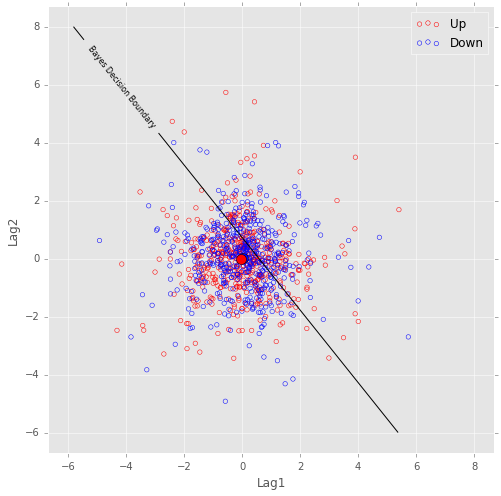

In [12]:
# Make a scatter plot of the lag predictors and show the Bayes decision boundary

# Scatter plot the data colored by market direction #
#####################################################
fig, ax = plt.subplots(figsize=(8,8))
# Plot the training lags color coded by market direction
ax.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1], facecolors='none', edgecolors='r', label='Up')
ax.scatter(X_train[Y_train==0][:,0],X_train[Y_train==0][:,1], facecolors='none', edgecolors='b', label='Down')

# Calculate Bayes Decision Boundary #
#####################################
# Construct a meshgrid to calulate Bayes Boundary over
nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

# Use predict_proba to calculate Probability at each x1,x2 pair
Z = lda_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# The Bayes Boundary for k=2 classes is the contour where P(Y=k|X=x) = 0.5
cp = ax.contour(xx, yy, Z, [0.5], linewidths=1., colors='k',clabel='Bayes Decision Boundary');
plt.clabel(cp, inline=True, fmt='Bayes Decision Boundary',fontsize=8)

# Plot mean lag vector (lag1,lag2) for each class 'Up' and 'Down' #
###################################################################
ax.plot(lda_clf.means_[0][0], lda_clf.means_[0][1], 'o', color='blue', markersize=10);
ax.plot(lda_clf.means_[1][0], lda_clf.means_[1][1], 'o', color='red', markersize=10);

ax.set_xlabel('Lag1')
ax.set_ylabel('Lag2')
ax.legend(loc='best');

In [13]:
# Get the models predictions for market directions on the test set
Y_predict = lda_clf.predict(test_df[predictors].values)
Y_predict = np.array(Y_predict > 0.5, dtype=float)
# get the actual market directions from the testing dataframe
Y_test = np.array([1 if el=='Up' else 0 for el in test_df.Direction.values])

# Compute Test Confusion Matrix #
#################################
table = np.histogram2d(Y_predict, Y_test , bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
# same results as using the logistic function

      Down   Up
Down    35   35
Up      76  106


## 4.6.4 Quadratic Discriminant Analysis of Market Direction

In [14]:
# Create a new classifier & Fit Training Data 
clf_qda = QDA()
clf_qda.fit(X_train, Y_train)
print('Class Priors =', clf_qda.priors_)
print('Class Means =', clf_qda.means_)
# Since we are using a quadratic model there are no coeffecients of linear discriminants

Class Priors = [ 0.492  0.508]
Class Means = [[ 0.0428  0.0339]
 [-0.0395 -0.0313]]


In [20]:
# Make predictions using the model on the test set
# Get the models predictions for market directions on the test set
Y_predict = clf_qda.predict(test_df[predictors].values)
Y_predict = np.array(Y_predict > 0.5, dtype=float)
# get the actual market directions from the testing dataframe
Y_test = np.array([1 if el=='Up' else 0 for el in test_df.Direction.values])

# Compute Test Confusion Matrix #
#################################
table = np.histogram2d(Y_predict, Y_test , bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('The model makes {0:.4f} correct predictions'.format(100*np.mean(Y_predict==Y_test)))

      Down   Up
Down    30   20
Up      81  121

The model makes 59.9206 correct predictions


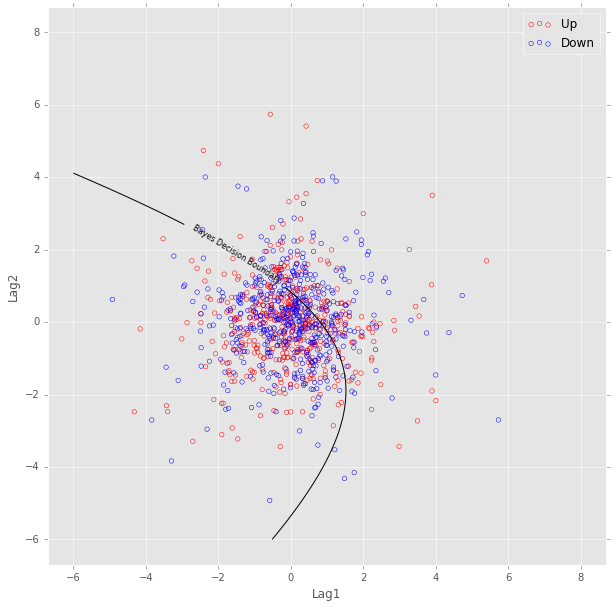

In [16]:
# Make a scatter plot of the lag predictors and show the Bayes decision boundary

# Scatter plot the data colored by market direction #
#####################################################
fig, ax = plt.subplots(figsize=(10,10))
# Plot the training lags color coded by market direction
ax.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1], facecolors='none', edgecolors='r', label='Up')
ax.scatter(X_train[Y_train==0][:,0],X_train[Y_train==0][:,1], facecolors='none', edgecolors='b', label='Down')

# Calculate Bayes Decision Boundary #
#####################################
# Construct a meshgrid to calulate Bayes Boundary over
nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

# Use predict_proba to calculate Probability at each x1,x2 pair
Z = clf_qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# The Bayes Boundary for k=2 classes is the contour where P(Y=k|X=x) = 0.5
cp = ax.contour(xx, yy, Z, [0.5], linewidths=1., colors='k',clabel='Bayes Decision Boundary');
plt.clabel(cp, inline=True, fmt='Bayes Decision Boundary',fontsize=8);
ax.set_xlabel('Lag1')
ax.set_ylabel('Lag2')
ax.legend(loc='best');


## K-Nearest Neighbors

In [17]:
# Build a KNN classifier 
training_labels = training_df.Direction.values
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

The Minkowski metric with p=2 is just the standard Euclidean distance metric.

In [22]:
# Make predictions using the model on the test set the predictors are still lag1 and lag2
# Get the models predictions for market directions on the test set
predicted_labels = knn_1.predict(test_df[predictors].values)
# get the actual market directions from the testing dataframe
testing_labels = test_df.Direction.values

# Compute Test Confusion Matrix #
#################################
predicted_values = np.array([1 if el=='Up' else 0 for el in predicted_labels])
testing_values = np.array([1 if el=='Up' else 0 for el in testing_labels])
                            
table = np.histogram2d(predicted_values, testing_values , bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('The model makes {0:.4f} correct predictions'.format(100*np.mean(predicted_values==testing_values)))

      Down  Up
Down    43  58
Up      68  83

The model makes 50.0000 correct predictions


Now lets try the three nearest neighbors...

In [21]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, training_labels)

# Make predictions using the model on the test set the predictors are still lag1 and lag2
# Get the models predictions for market directions on the test set
predicted_labels = knn_3.predict(test_df[predictors].values)
# get the actual market directions from the testing dataframe
testing_labels = test_df.Direction.values

# Compute Test Confusion Matrix #
#################################
predicted_probabilities = np.array([1 if el=='Up' else 0 for el in predicted_labels])
testing_values = np.array([1 if el=='Up' else 0 for el in testing_labels])
                            
table = np.histogram2d(predicted_values, testing_values , bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('The model makes {0:.4f} correct predictions'.format(100*np.mean(predicted_values==testing_values)))


      Down  Up
Down    43  58
Up      68  83

The model makes 50.0000 correct predictions


Note the confusion matrix is off by one from the text. This is likely due to the fact that some neighbors are equidistant from a one of the points. In R you can set a random seed to reproduce which one is chosen. In sklearn, the choice is based on the order the points appear in the data.

## K-Nearest Neighbors Applied to Caravan Insurance Data

In [23]:
# get dim of caravan data. There are 85 predictors involving various demograpic characteristics for 5822 individuals.
caravan_df.shape

(5822, 86)

In [24]:
# This last column is describes whether the individual purchased insurance 
print(caravan_df.columns[-1])
print(caravan_df.Purchase[:3])
caravan_df.Purchase.describe()

Purchase
1    No
2    No
3    No
Name: Purchase, dtype: object


count     5822
unique       2
top         No
freq      5474
Name: Purchase, dtype: object

In [25]:
print('The probability an individual purchased car insurance was,',
      1- caravan_df.Purchase.describe().freq / len(caravan_df.Purchase))

The probability an individual purchased car insurance was, 0.0597732737891


In [31]:
np.random.seed(0)
# Standardize the Variables #
#############################
X = scale(caravan_df.iloc[:,0:85].values, axis=0)

# check that X[:,1] is now standardized
#print('mean =', np.mean(X[:,0]), 'variance = ', np.var(X[:,0]))

# Split the Data #
##################
# Get the response variable coding 0's and 1's
Y = np.array([1 if el=='Yes' else 0 for el in caravan_df.Purchase.values])

# Choose a random subset of the data, note the text does not randomly choose but it is a good idea
# number of training points
num_train_points = 1000

points = np.random.choice([False,True],size=len(X), p=[1-num_train_points/len(X) ,num_train_points/len(X)])

# Split the data into training and testing sets and get the responses
X_train = X[~points]
X_test = X[points]

# Build a k=1 neighbor classifier from the training data #
##########################################################
num_neighbors = 1
knn = KNeighborsClassifier(n_neighbors=num_neighbors)
Y_train = Y[~points]
knn.fit(X_train, Y_train)

# Make Label Predictions on the Test Data #
###########################################
predicted_labels = knn.predict(X_test)
actual_labels = Y[points]
# get the error rate
error_rate = np.mean(predicted_labels != actual_labels)
print('The error rate for k={0:d} is {1:.3f} %'.format(num_neighbors, 100*error_rate))
# Note that the number of people who bought car insurance was just under 6% so if we always predicted no we would 
# get an error rate of 6%

# Make a confusion matrix #
###########################
table = np.histogram2d(predicted_labels, actual_labels , bins=2)[0]
print(pd.DataFrame(table, ['No', 'Yes'], ['No', 'Yes']))
print('')
print('There were {0:.0f} customers predicted to buy insurance. The actual number who purchased was {1:.0f}. This gives {2:.3f} %'.format(table[1,0]+table[1,1], table[1,1], 100*table[1,1]/(table[1,0]+table[1,1])))


/usr/lib/python3/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


The error rate for k=1 is 11.345 %
      No  Yes
No   876   47
Yes   66    7

There were 73 customers predicted to buy insurance. The actual number who purchased was 7. This gives 9.589 %


In [32]:
# Build a k=3 Neighbor Classifier #
###################################
num_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=num_neighbors)
Y_train = Y[~points]
knn.fit(X_train, Y_train)

# Make Label Predictions on the Test Data #
###########################################
predicted_labels = knn.predict(X_test)
actual_labels = Y[points]

# Make a confusion matrix #
###########################
table = np.histogram2d(predicted_labels, actual_labels , bins=2)[0]
print(pd.DataFrame(table, ['No', 'Yes'], ['No', 'Yes']))
print('')
print('There were {0:.0f} customers predicted to buy insurance. The actual number who purchased was {1:.0f}. This gives {2:.3f} %'.format(table[1,0]+table[1,1], table[1,1], 100*table[1,1]/(table[1,0]+table[1,1])))


      No  Yes
No   924   51
Yes   18    3

There were 21 customers predicted to buy insurance. The actual number who purchased was 3. This gives 14.286 %


In [33]:
# Build a k=5 Neighbor Classifier #
###################################
num_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=num_neighbors)
Y_train = Y[~points]
knn.fit(X_train, Y_train)

# Make Label Predictions on the Test Data #
###########################################
predicted_labels = knn.predict(X_test)
actual_labels = Y[points]

# Make a confusion matrix #
###########################
table = np.histogram2d(predicted_labels, actual_labels , bins=2)[0]
print(pd.DataFrame(table, ['No', 'Yes'], ['No', 'Yes']))
print('')
print('There were {0:.0f} customers predicted to buy insurance. The actual number who purchased was {1:.0f}. This gives {2:.3f} %'.format(table[1,0]+table[1,1], table[1,1], 100*table[1,1]/(table[1,0]+table[1,1])))


      No  Yes
No   936   51
Yes    6    3

There were 9 customers predicted to buy insurance. The actual number who purchased was 3. This gives 33.333 %
